In [485]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [486]:
#Data Loading
df=pd.read_csv(r"D:\CSV files\airbnb.csv")

In [487]:
#Data Inspection
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [488]:
df.shape

(48895, 16)

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [490]:
#Creating new dataframe 'X' with variables latitude and logitude to from clusters
X=df[['latitude','longitude']]

In [491]:
#No Null Values
X.isnull().sum()

latitude     0
longitude    0
dtype: int64

In [492]:
#Checking for duplicates
X.duplicated().sum()

24

In [493]:
#Removing duplicates
X = X.drop_duplicates()

In [494]:
X.shape

(48871, 2)

In [495]:
#Converting to 2-Dimensional array
X = X.values

In [496]:
X

array([[ 40.64749, -73.97237],
       [ 40.75362, -73.98377],
       [ 40.80902, -73.9419 ],
       ...,
       [ 40.81475, -73.94867],
       [ 40.75751, -73.99112],
       [ 40.76404, -73.98933]])

In [497]:
#Builidng K-means model with no.of clusters as 3
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(X)

KMeans(n_clusters=3)

In [498]:
#Making Predcitions
predict = kmean.predict(X)

In [499]:
#First 10 values
X[0:10]

array([[ 40.64749, -73.97237],
       [ 40.75362, -73.98377],
       [ 40.80902, -73.9419 ],
       [ 40.68514, -73.95976],
       [ 40.79851, -73.94399],
       [ 40.74767, -73.975  ],
       [ 40.68688, -73.95596],
       [ 40.76489, -73.98493],
       [ 40.80178, -73.96723],
       [ 40.71344, -73.99037]])

In [500]:
#First 10 predictions
predict[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

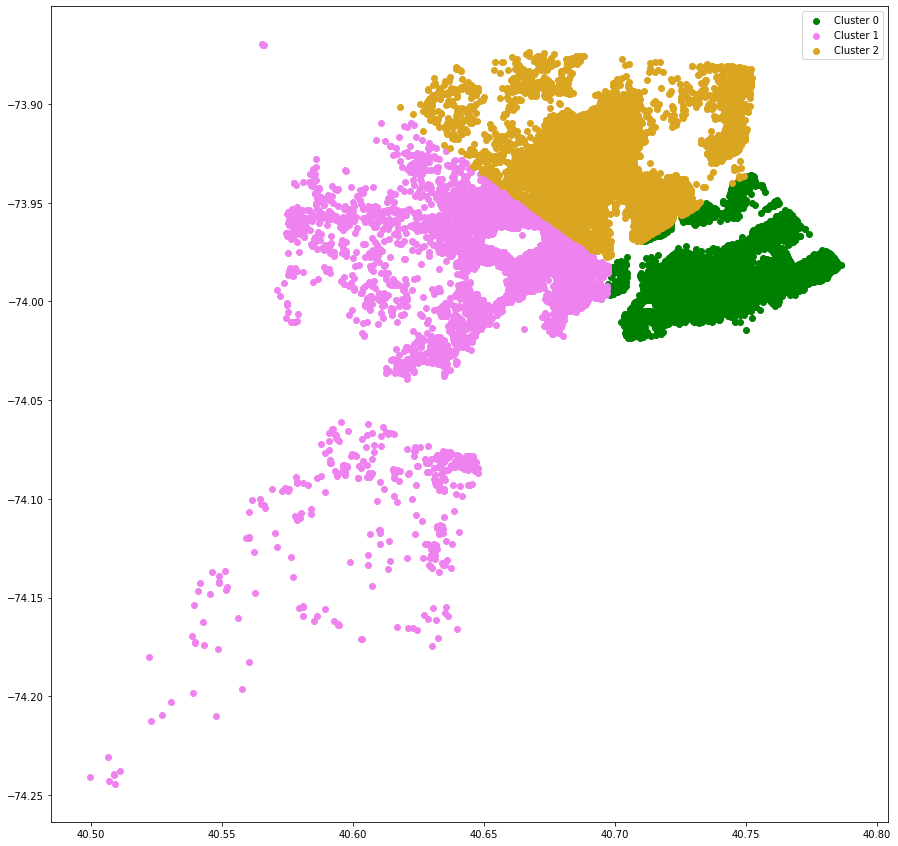

In [522]:
#Plotting Clusters
colors = ['green', 'violet', 'goldenrod']

for cluster_id, color in enumerate(colors):
    cluster_indices = np.where(predict == cluster_id)
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], c=color, label=f'Cluster {cluster_id}')
plt.rcParams['figure.figsize'] = (15, 15) 
plt.legend()
plt.show()


The Elbow Method is a graphical approach used to determine the optimal number of clusters in a dataset when performing cluster analysis, such as K-means clustering. It helps to find the point where the addition of more clusters doesn't significantly improve the variance explained by the data's clustering.

Inertia, also known as within-cluster sum of squares or total within-cluster variance, is a measure used to evaluate the quality of clusters in a clustering algorithm, such as K-means. It quantifies how tightly the data points within a cluster are grouped around the centroid of that cluster.

In [502]:
#Finding Optimal K value using Elbow Method
k_inertia = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit(X_new)
    print('K Value -',i,'Inertia -',km.inertia_)
    k_inertia.append(km.inertia_)

K Value - 1 Inertia - 77641.99999999997
K Value - 2 Inertia - 50818.39420895431
K Value - 3 Inertia - 33999.606857927596
K Value - 4 Inertia - 24465.58679366754
K Value - 5 Inertia - 19464.79227305295
K Value - 6 Inertia - 16846.765488001085
K Value - 7 Inertia - 14519.16672773699
K Value - 8 Inertia - 12402.782470381757
K Value - 9 Inertia - 10774.186236856232
K Value - 10 Inertia - 9575.866000494623
K Value - 11 Inertia - 8410.693609463018
K Value - 12 Inertia - 7590.839181669426
K Value - 13 Inertia - 6885.349925930406
K Value - 14 Inertia - 6289.7523493210565
K Value - 15 Inertia - 5826.248578828786
K Value - 16 Inertia - 5380.866525160677
K Value - 17 Inertia - 5041.483353015821
K Value - 18 Inertia - 4703.992006722753
K Value - 19 Inertia - 4449.9168914187685
K Value - 20 Inertia - 4156.01628348206


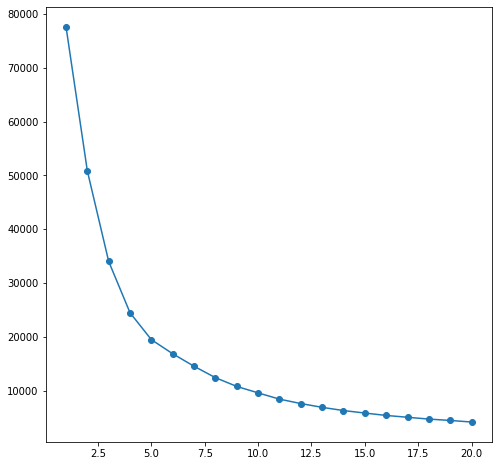

In [524]:
#Plotting K cvalues against Inertia
fig = plt.figure(figsize=(8, 8))
plt.scatter(range(1,21),k_inertia)
plt.plot(range(1,21),k_inertia)
plt.show()

By examining the plot, it becomes evident that there is a noticeable change in direction when the value of K is set to 5. This implies that according to the Elbow method, the optimal number of clusters is 5.

In [516]:
#Builidng K-means model with no.of clusters as 5
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5)
kmean.fit(X)

KMeans(n_clusters=5)

In [517]:
#Making Predictions
predict = kmean.predict(X)

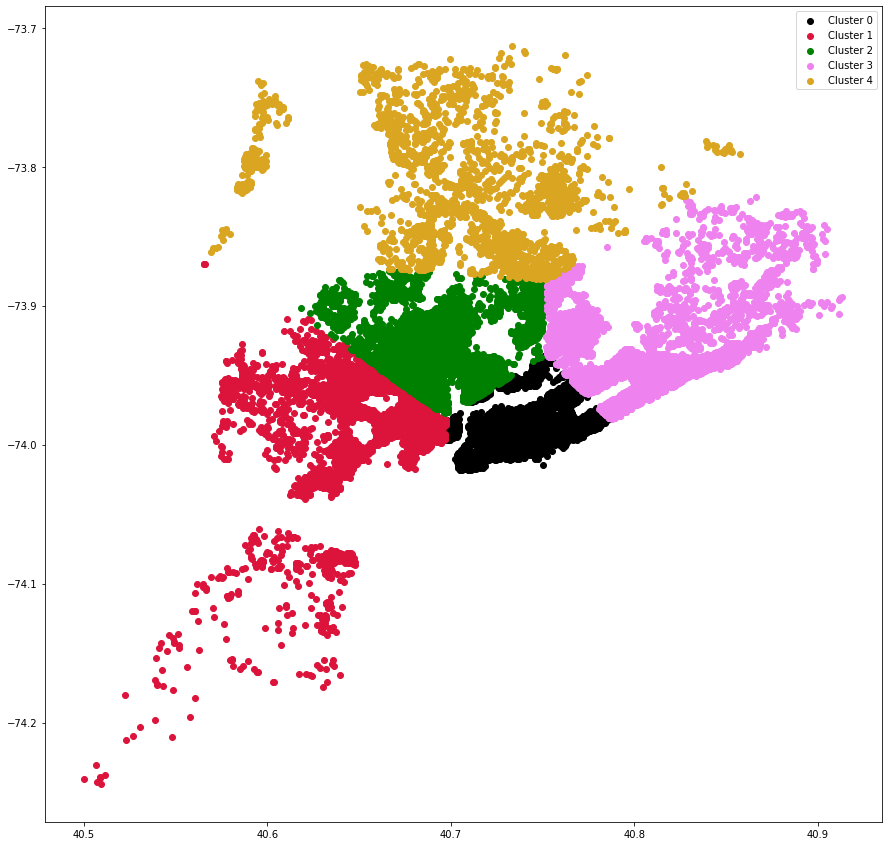

In [526]:
#Plotting Clusters
colors = ['black', 'crimson', 'green', 'violet', 'goldenrod']

plt.rcParams['figure.figsize'] = (15, 15) 
for cluster_id, color in enumerate(colors):
    cluster_indices = np.where(predict == cluster_id)
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1], c=color, label=f'Cluster {cluster_id}')

plt.legend()
plt.show()
